<a href="https://colab.research.google.com/github/roseleen-kaur/DataAnalytics_2022_Summer/blob/main/R_Kaur_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1#
Roseleen Kaur

#<u>Pima Indian Diabetes Data</u>#
![picture](https://drive.google.com/uc?id=1wxwZ7-8BUs55GsbZHMO3JHDfX-wOoaCv)
##Data Summary##
"[This](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."

All of the attrbutes in this data set are numerical, quantitative data. 

<u>Attributes:</u> 
1. Number of times pregnant: Pregnancies
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mmHg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Explainations for some attributes:
###How does pregnancies relate to diabetes?###

Many women do end up with diabetes during pregnancy, but the amount of kids you've given birth t doesn't relate to the outcome of you have diabetes. Many people who have given birth don't have diabetes.


###What is Glucose in this data set?###
Glucose in this data set is measured at 2 hours in a Oral Glucose Tolerance Test. What exactly is that? 

"The [glucose](https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296) tolerance test, also known as the oral glucose tolerance test, measures your body's response to sugar (glucose). The glucose tolerance test can be used to screen for type 2 diabetes. More commonly, a modified version of the glucose tolerance test is used to diagnose gestational diabetes — a type of diabetes that develops during pregnancy."

The higher your glucose level the more chances that you have diabetes

###What is Blood Pressure in this data set?###

When checking the blood pressure of someone there are two numbers that show up, one on the top which is the systolic bp, and the bottom number is diastolic bp. For a healthy adult a diastolic pressure of less than 80 is good. 
"[High](https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure) blood pressure is twice as likely to strike a person with diabetes than a person without diabetes."


###Diabetes Pedigree Function### 
 "[indicates](https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/#:~:text=Diabetes%20Pedigree%20Function%3A%20indicates%20the,%3D%20yes%2C%200%20%3D%20no) the function which scores likelihood of diabetes based on family history..."
###Insulin?###

"A fasting [insulin](https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/) level should never be 0, which it might be in a person with untreated Type 1. It shouldn't go below 3. But a high insulin level is just as problematic. A high insulin level is a sign of insulin resistance or prediabetes." 

The lower your insulin level is, the more possibilities that you might have diabetes because your body needs to produce insulin to control glucose levels. 

###Skin Thickeness?###

"The [triceps](https://nutritionalassessment.mumc.nl/en/skinfold-measurements) skinfold is necessary for calculating the upper arm muscle circumference. Its thickness gives information about the fat reserves of the body..."
  
 ...Which relates directly to:
###BMI###
"[Women](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3066828/#:~:text=Women%20with%20a%20body%20mass,is%2035%20kg%2Fm2.&text=The%20presence%20of%20diabetes%20can,of%20heart%20disease%202%2Dfold.) with a body mass index (BMI) of 30 kg/m2 have a 28 times greater risk of developing diabetes than do women of normal weight"

[Though](https://www.webmd.com/diabetes/features/do-thin-people-get-diabetes): "You don't have to be overweight or obese to get type 2 diabetes. In fact, you can have high blood sugar even if you look thin. Around 10% to 15% of people with type 2 diabetes are at a healthy weight. It's called lean diabetes."

But most of the time the higher your BMI, the more chances you have at being diabetic. 

###Target Variable###
Our target variable, "the [variable](https://h2o.ai/wiki/target-variable/#:~:text=The%20target%20variable%20is%20the%20variable%20whose%20values%20are%20modeled,value%20of%20the%20target%20variable.) whose values are modeled and predicted by other variables, is the last column", is Outcome. It tells us whether someone has diabetes or not; with yes being a 1, and no being a 0. 


##In this Project##
We will be focsuing on one question:

"In this dataset, does higher Glucose, BMI, and Insulin level relate to having an outcome of diabetes?"

Obviously as mentioned above these things do mean that you have higher blood pressure, but for testing purposes. :)



#EDA#

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier

In [163]:
diab = pd.read_csv('https://raw.githubusercontent.com/roseleen-kaur/DataAnalytics_2022_Summer/main/diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [144]:
#shape 
diab.shape

(768, 9)

In [145]:
#getting info on each variable
diab_info = pd.DataFrame(diab.dtypes, columns=['Dtype'])

diab_info['NUnique'] = diab.nunique()
diab_info['Missing Vals'] = diab.isnull().sum()
diab_info['Count'] = diab.count()
diab_info['Zeros'] = (diab==0).sum()
diab_info['?'] = (diab=='?').sum()


diab_info


,Dtype,NUnique,Missing Vals,Count,Zeros,?
Pregnancies,int64,17,0,768,111,0
Glucose,int64,136,0,768,5,0
BloodPressure,int64,47,0,768,35,0
SkinThickness,int64,51,0,768,227,0
Insulin,int64,186,0,768,374,0
BMI,float64,248,0,768,11,0
DiabetesPedigreeFunction,float64,517,0,768,0,0
Age,int64,52,0,768,0,0
Outcome,int64,2,0,768,500,0


Our data doesn't have any missing values, or question marks.

I changed the data type for outcome.

In [146]:
diab[['Outcome']] = diab[['Outcome']].astype('object')
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [147]:
num_features = []
cat_features = []
for i in diab.columns:
  if diab[i].dtype != 'object':
    num_features.append(i)
  else: 
    cat_features.append(i)
print(f'Numerical Features:\n {num_features}')
print(f'Categorical Features:\n {cat_features}')
diab.head()
#I made outcome a catrgorical variable because it's either you have diabetes or you don't.
#No counting involved.

Numerical Features:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Features:
 ['Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


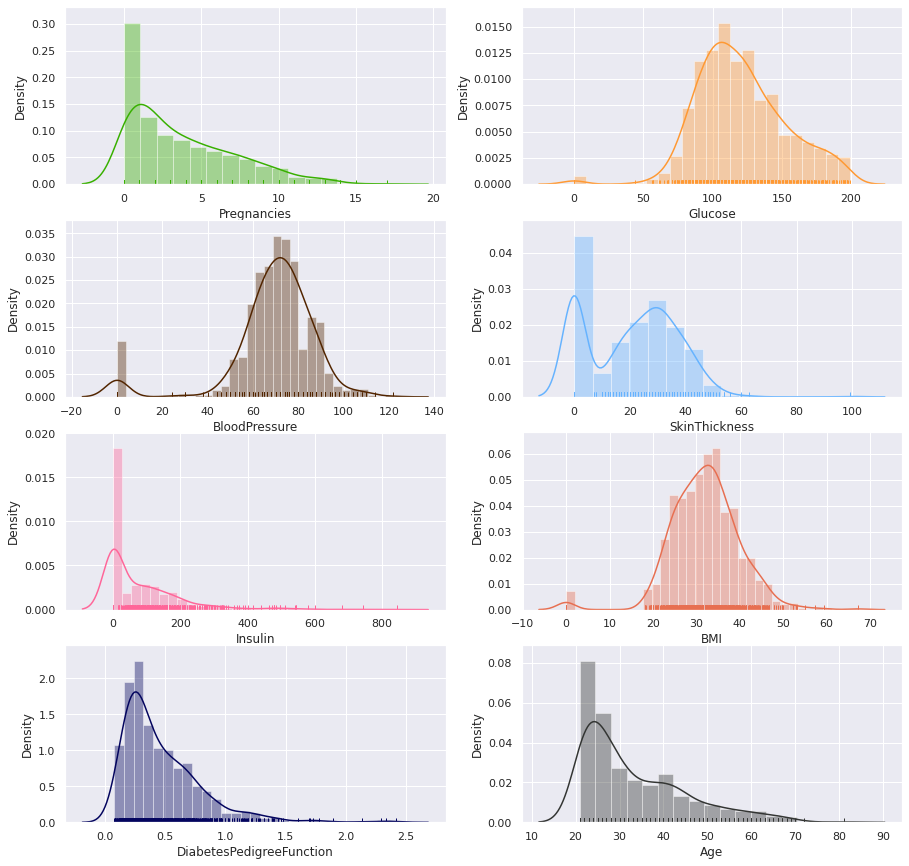

In [148]:
#found this online, thought it looked alot better than what I had.
#https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/#:~:text=Diabetes%20Pedigree%20Function%3A%20indicates%20the,%3D%20yes%2C%200%20%3D%20no)
#i promise I only scrolled down enough to get cool graphs, didn't copy much else
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
sns.distplot(diab['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(diab['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(diab['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(diab['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(diab['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(diab['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(diab['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(diab['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

In [149]:
#describe
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Looking at the information above some of it doesn't really make too much sense. How can someone's diaslotic blood pressure be 0. Similar situation with BMI,Glucose, Skin Thickness. We need to fix this since it is integral to my question. 

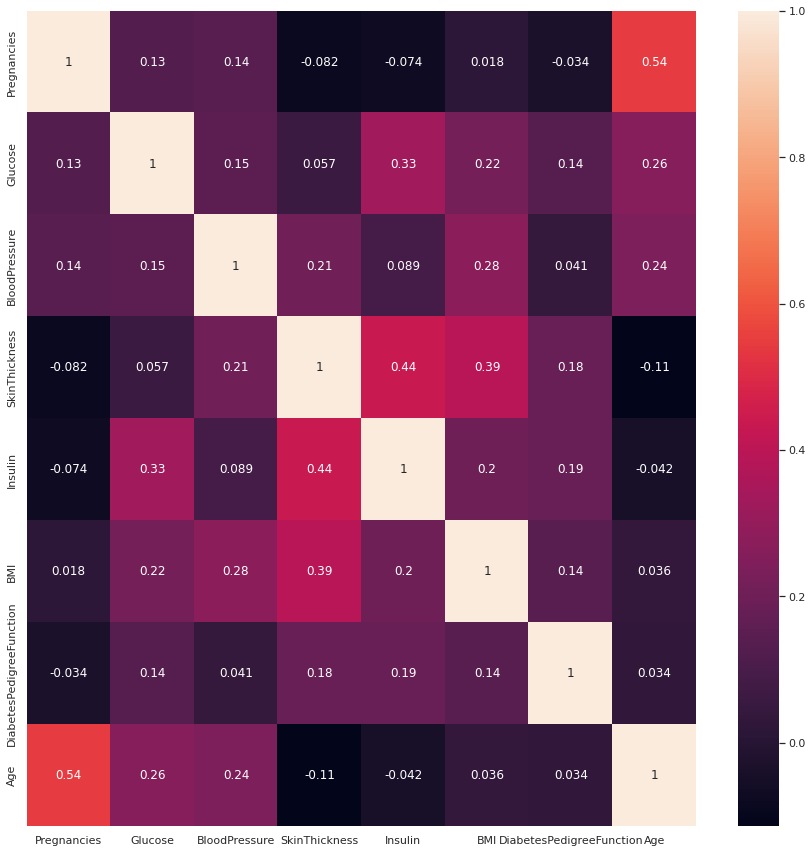

In [150]:
#correlations before for native data
cormat = diab.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
f3 = sns.heatmap(cormat, annot=True)
plt.show()

Observing at this correlation matrix we can see that Age and Pregnancies seem to have the most correlation, but that isn't what we want to concentrate on. Other attrubutes that have a higher correlaton are Insulin to Glucose, Skin Thickness to BMI and that seems to be it. 

##Duplicate Data##
We check for duplicate data here. I don't want to change any data before I check if there are any duplicates.

In [151]:
print(diab[diab.duplicated(subset=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])])
#nice there are no duplicates.

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Great there is no duplicate data.

##Outliers##


<function matplotlib.pyplot.show>

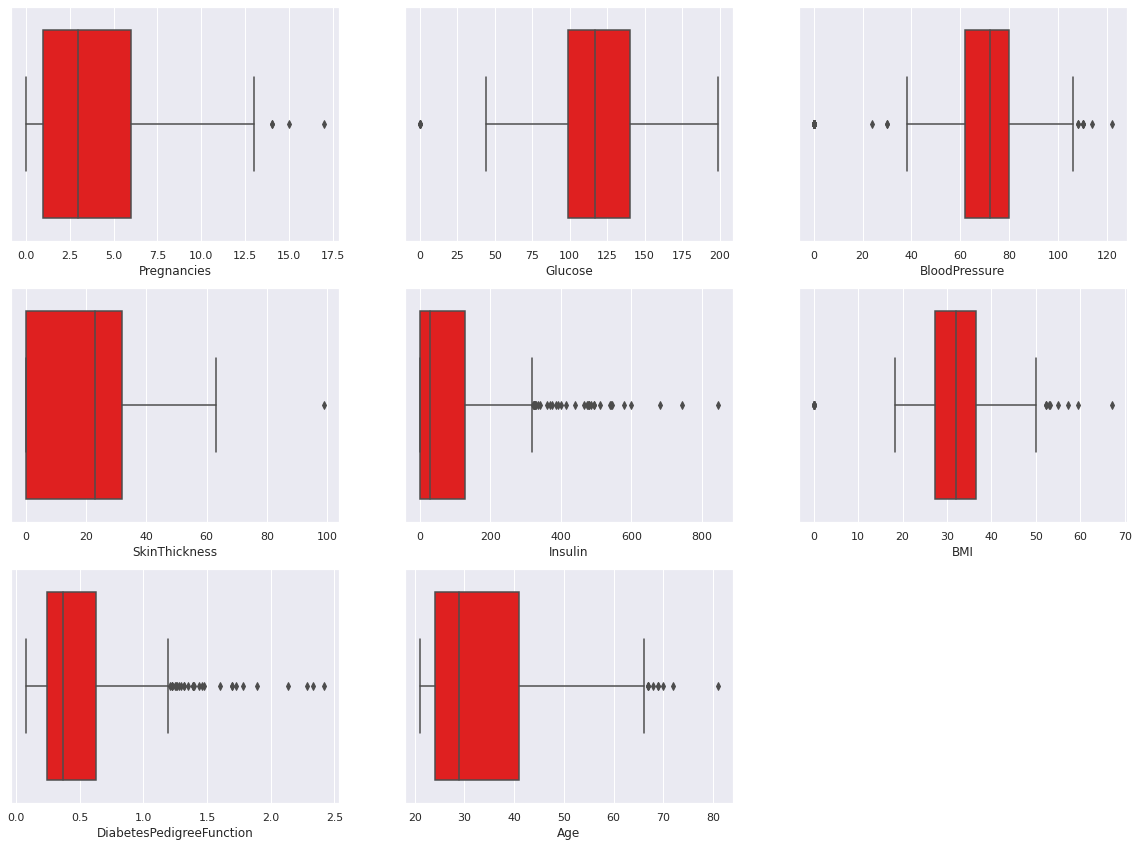

In [152]:
#box plots to check any outliers
plt.figure(figsize=(20,25))

import warnings
warnings.filterwarnings("ignore")

j=1 
columns = diab.columns.tolist() #makes lists of the cols 
for k in num_features[0:]:
  plt.subplot(5,3,j)
  sns.boxplot(x=k, data = diab, color= 'red')
  j=j+1 #the way to map the plots in the output

plt.show

Wow, a lot of outliers for insulin, BMI and Diabetes Pedigree Function. Since I am speicifically focusing on Glucose, BMI and Insulin for my question, I will only examine the outliers on those 3 attributes.

In [153]:
insulin_outliers = diab[np.abs(diab['Insulin'] - diab['Insulin'].mean() ) > (2.5 * diab['Insulin'].std() )]
insulin_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1
247,0,165,90,33,680,52.3,0.427,23,0
248,9,124,70,33,402,35.4,0.282,34,0


In [154]:
insulin_outliers.shape

(24, 9)

In [155]:
glucose_outliers = diab[np.abs(diab['Glucose'] - diab['Glucose'].mean() ) > (2.5 * diab['Glucose'].std() )]
glucose_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [156]:
#not to many outlers here
glucose_outliers.shape

(5, 9)

In [157]:
BMI_outliers = diab[np.abs(diab['BMI'] - diab['BMI'].mean() ) > (2.5 * diab['BMI'].std() )]
BMI_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [158]:
BMI_outliers.shape

(19, 9)

As we can see above, alot of the outliers, expect for insulin, have the value of 0. These are the values we need to fix. The outliers will be calulated again after data imputation. 


##Chi Square##

In [164]:
X = diab.drop('Outcome',1)
y = diab['Outcome']
test = SelectKBest(score_func = chi2, k=4)
fit = test.fit(X,y)
feature_score = pd.DataFrame()
#perform chi-square test
for i in range(X.shape[1]):
  chi = pd.DataFrame({'Features' : X.columns[i],'Score':fit.scores_[i]},index=[i])
  feature_score = pd.concat([feature_score, chi])
feature_score

,Features,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


As we see above features such as Glucose, Insulin, BMI, Age, Pregnancies don't seem to effect the outcome as much. 

Features like DiabetesPedigreeFunction, Skin Thickness, and Blood Pressure do effect the outcome alot.

Which leads me to believe that the question that I posed earlier won't be supported by this data set as much as I thought it would. But I will keep my hypothesis.

###Subset###
I will make a subset of data here to group the infomation I want together and then show the missing values as 0, because there are no other missing values, but having a 0 as data doesn't make sense. 

In [165]:
my_question = diab[["BMI", "Insulin", "Glucose",'Outcome']]
my_question

,BMI,Insulin,Glucose,Outcome
0,33.6,0,148,1
1,26.6,0,85,0
2,23.3,0,183,1
3,28.1,94,89,0
4,43.1,168,137,1
...,...,...,...,...
763,32.9,180,101,0
764,36.8,0,122,0
765,26.2,112,121,0
766,30.1,0,126,1


In [166]:
print(f"Shape: {my_question.shape}")

my_question.dtypes

Shape: (768, 4)


BMI        float64
Insulin      int64
Glucose      int64
Outcome      int64
dtype: object

In [167]:
my_question.describe()

,BMI,Insulin,Glucose,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,31.992578,79.799479,120.894531,0.348958
std,7.884160,115.244002,31.972618,0.476951
min,0.000000,0.000000,0.000000,0.000000
25%,27.300000,0.000000,99.000000,0.000000
50%,32.000000,30.500000,117.000000,0.000000
75%,36.600000,127.250000,140.250000,1.000000
max,67.100000,846.000000,199.000000,1.000000


In [168]:
df_info = pd.DataFrame(my_question.dtypes, columns=['Dtype'])
df_info['Zeros'] = (my_question==0).sum()
df_info

,Dtype,Zeros
BMI,float64,11
Insulin,int64,374
Glucose,int64,5
Outcome,int64,500


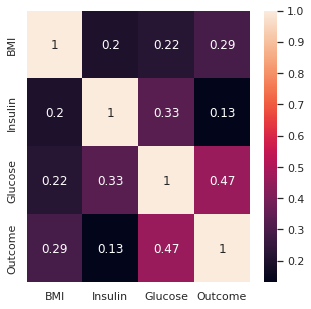

In [169]:

cormat = my_question.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(5,5)})
f3 = sns.heatmap(cormat, annot=True)
plt.show()

#Data Cleaning#
We have to find a way to fix those 0 value for my_question subset. We can fill the data in with the median, mean, mode, to help get better grasp of our data. In this case I will fill the data up with median. 

In [170]:
g = my_question['Glucose'].median()
print(f'Glucose: {g}')
i = my_question['Insulin'].median()
print(f'Insulin: {i}')
b = my_question['BMI'].median()
print(f'BMI: {b}')

Glucose: 117.0
Insulin: 30.5
BMI: 32.0


In [171]:
my_question.loc[my_question['Glucose'] == 0, 'Glucose'] = g
my_question.loc[my_question['Insulin'] == 0, 'Insulin'] = i
my_question.loc[my_question['BMI'] == 0, 'BMI'] = b

In [ ]:
df_info = pd.DataFrame(my_question.dtypes, columns=['Dtype'])
df_info['Zeros'] = (my_question==0).sum()
df_info

,Dtype,Zeros
BMI,float64,0
Insulin,float64,0
Glucose,int64,0
Outcome,int64,500


In [172]:
my_question.describe()

,BMI,Insulin,Glucose,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,32.450911,94.652344,121.656250,0.348958
std,6.875366,105.547598,30.438286,0.476951
min,18.200000,14.000000,44.000000,0.000000
25%,27.500000,30.500000,99.750000,0.000000
50%,32.000000,31.250000,117.000000,0.000000
75%,36.600000,127.250000,140.250000,1.000000
max,67.100000,846.000000,199.000000,1.000000


THere we go, all of the 0's in these 3 columns in my subset have now been replaces with their median values. 

Let's see if the correlations changed.

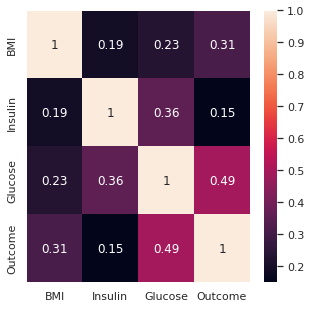

In [173]:
#correlations before for filled in data
cormat = my_question.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(5,5)})
f3 = sns.heatmap(cormat, annot=True)
plt.show()

It seems that the correaltion for Insulation and Glucose have increased from 
0.33 to 0.36; as well as the correlation for BMI to Glucose, but for Insulin to BMI it has deccreased.

<function matplotlib.pyplot.show>

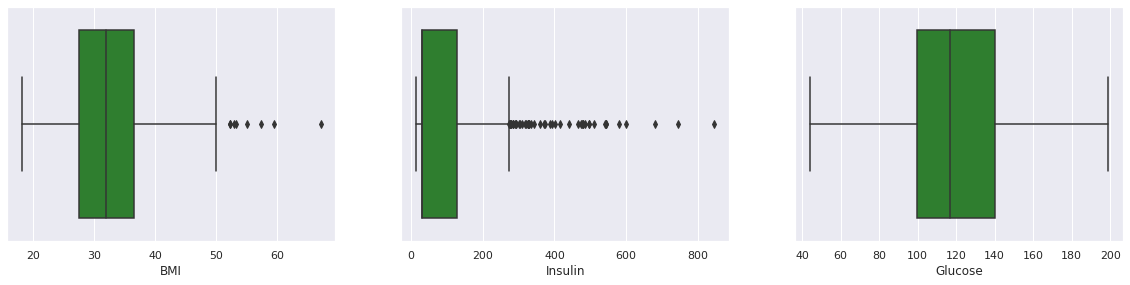

In [176]:
#I also want to check the outliers again, just to see what changed
plt.figure(figsize=(20,25))

import warnings
warnings.filterwarnings("ignore")

j=1 
columns = my_question.columns.tolist() #makes lists of the cols 
for k in columns[:3]:
  plt.subplot(5,3,j)
  sns.boxplot(x=k, data = my_question, color= 'forestgreen')
  j=j+1 #the way to map the plots in the output

plt.show

As you can see now that we got rid of the 0's the outliers are a bit different. Glucose doesn't have any. Insulin actually looks pretty much the same except the beginning percentile change from 0 to 14.

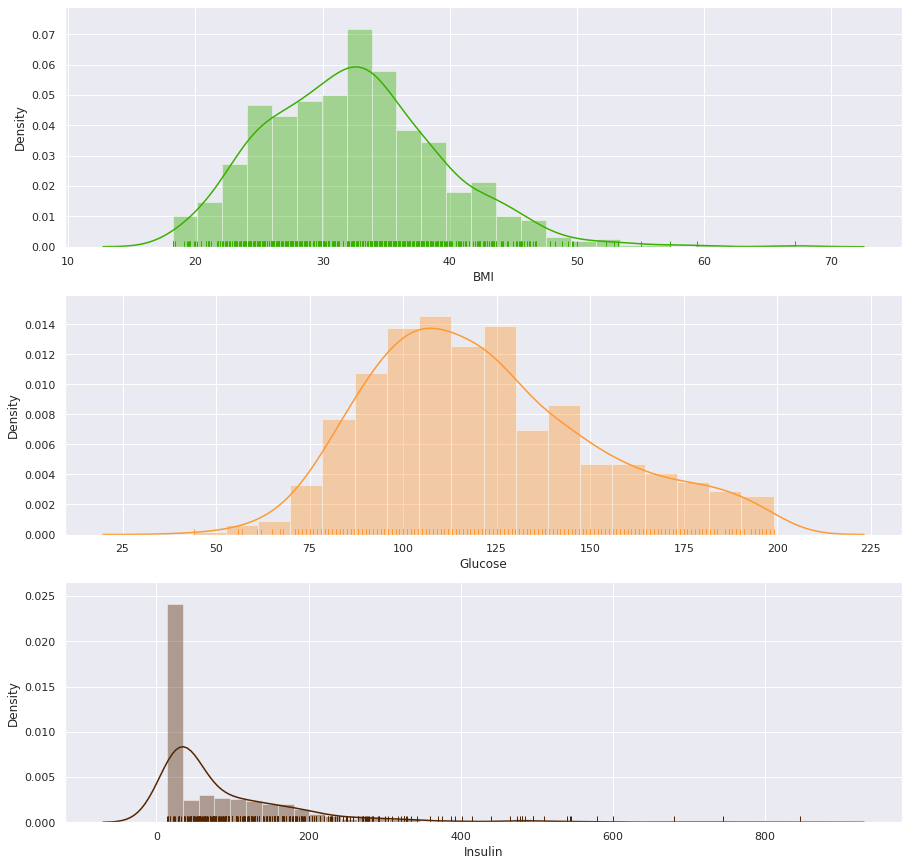

In [177]:
fig, axs = plt.subplots(3, 1, figsize=(15,15))
axs = axs.flatten()
sns.distplot(my_question['BMI'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(my_question['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(my_question['Insulin'],rug=True,color='#522500',ax=axs[2])

The graphs for glucose and BMI show a bell shaped curve. I didn't think standardizing the data would really do much, so I left it this way. 

#Crosstabs and Groupby#

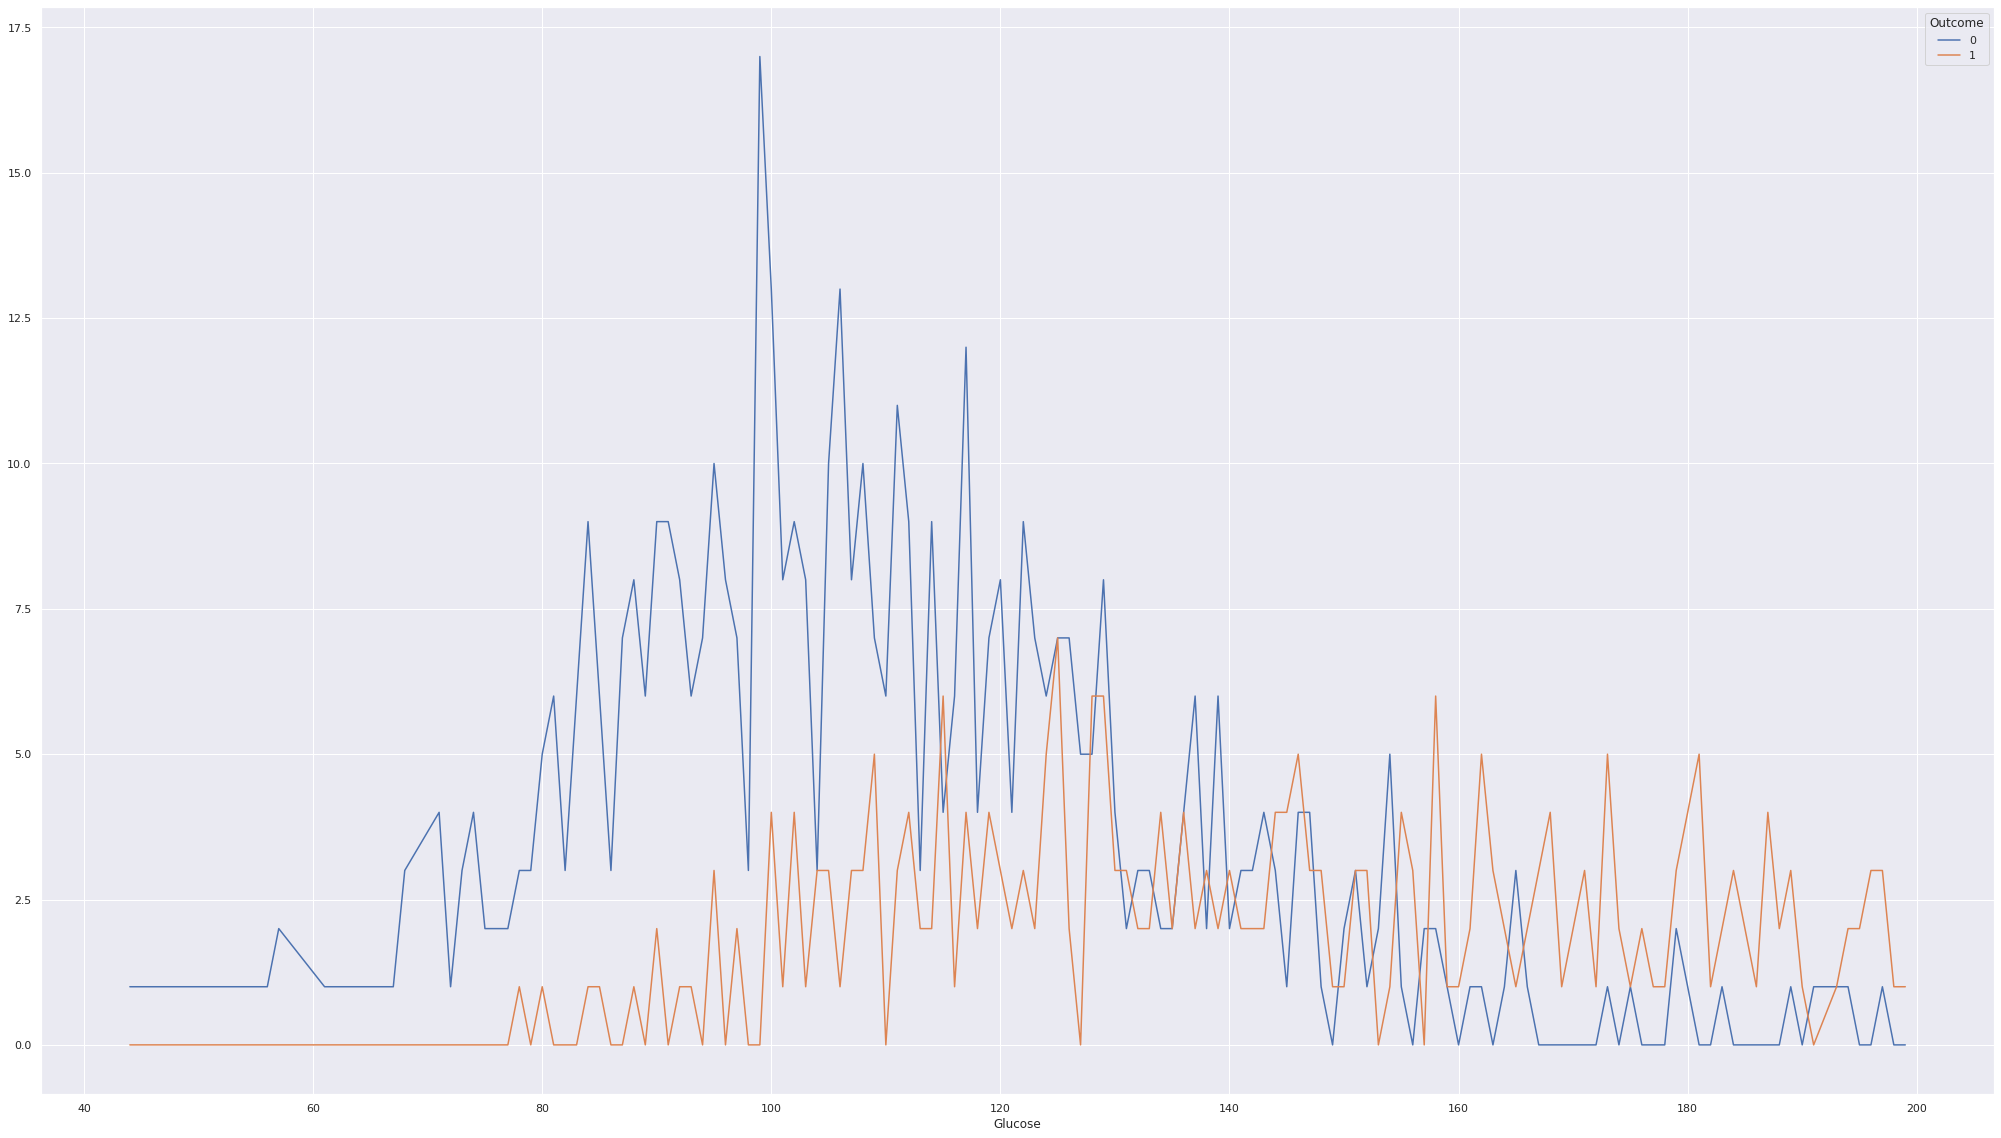

In [178]:
gct = pd.crosstab(my_question.Glucose,my_question.Outcome)
scatterplot = gct.plot.line(rot=0, figsize= (35,20))

In [179]:
pd.crosstab(my_question.Glucose,my_question.Outcome).describe()

Outcome,0,1
count,135.000000,135.000000
mean,3.703704,1.985185
std,3.515582,1.675037
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,6.000000,3.000000
max,17.000000,7.000000


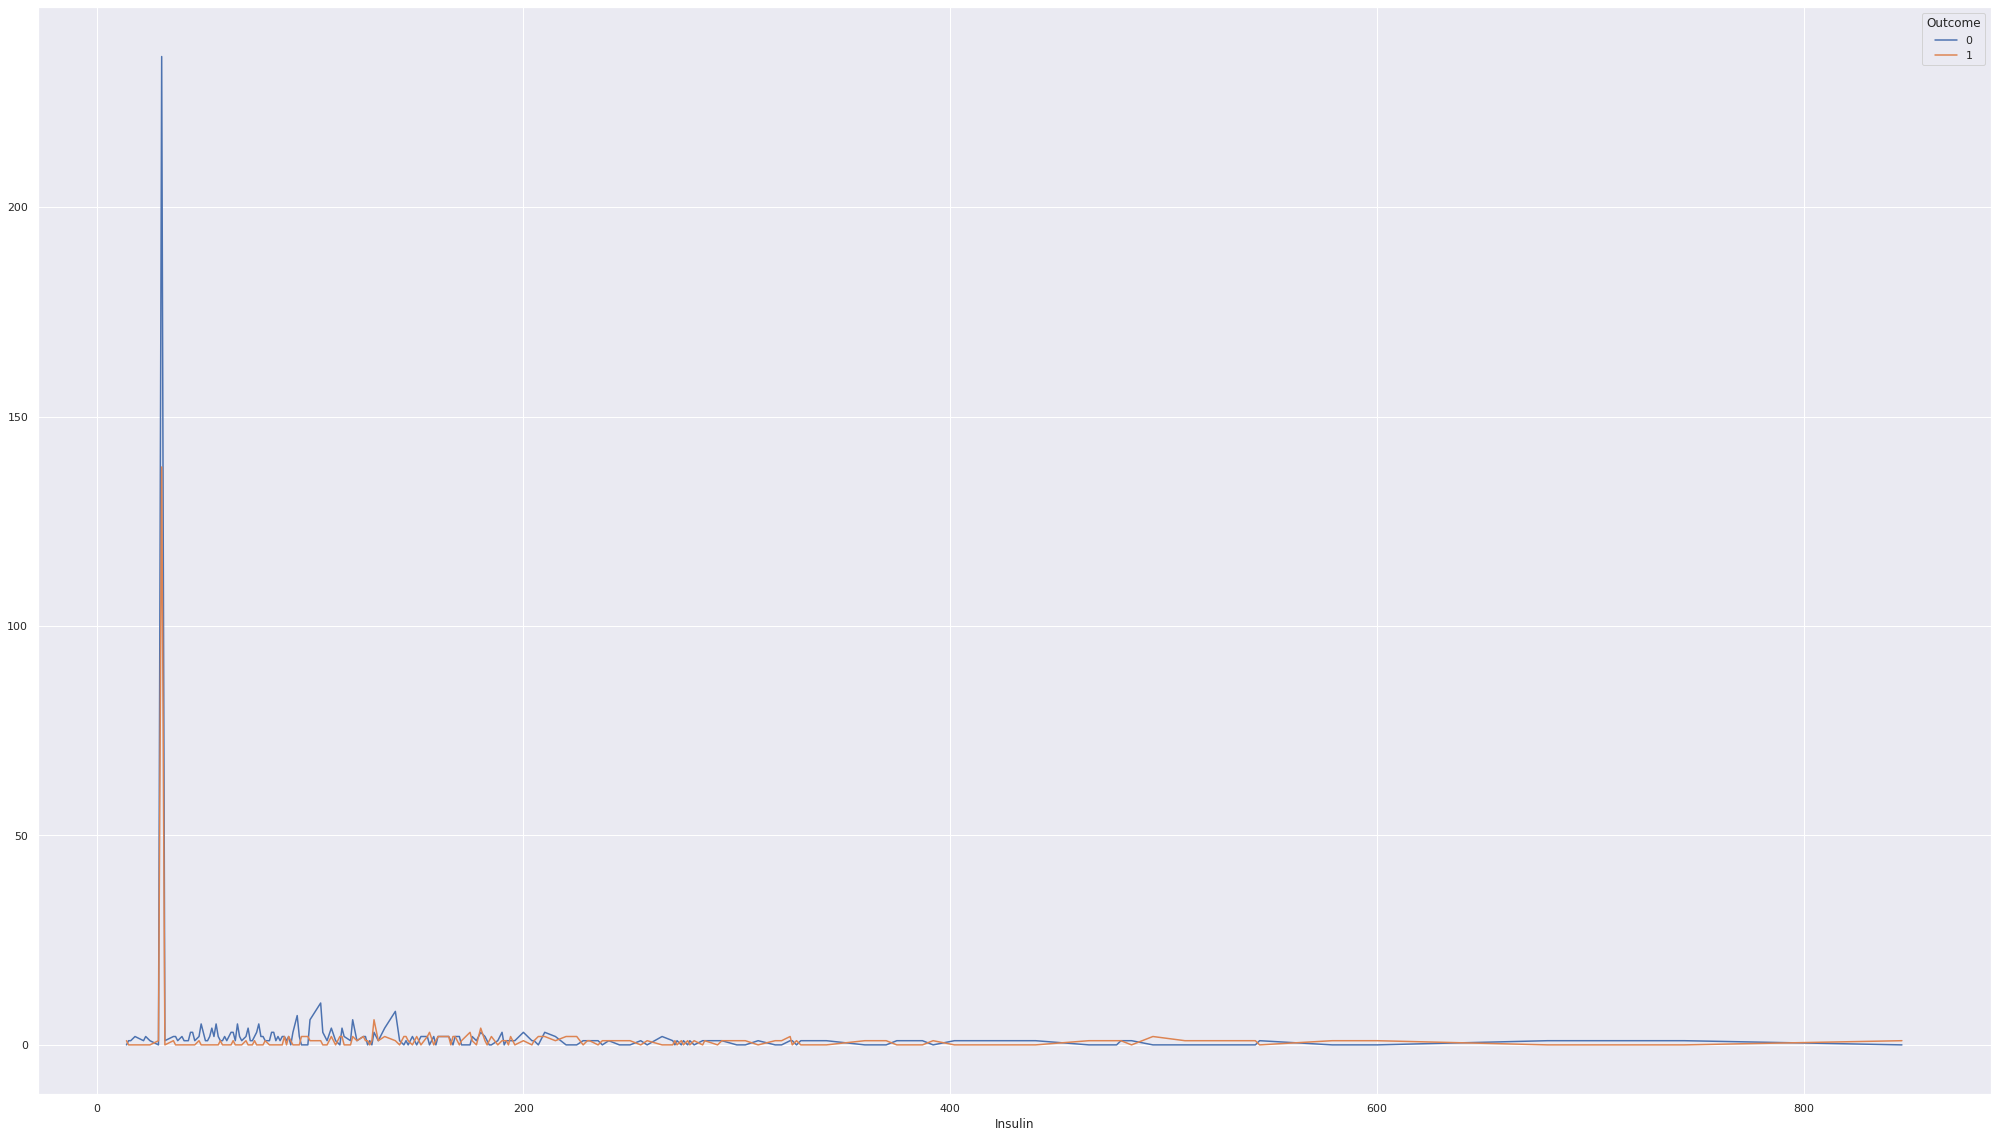

In [180]:
ict = pd.crosstab(my_question.Insulin,my_question.Outcome)
scatterplot = ict.plot.line(rot=0, figsize= (35,20))

In [181]:
pd.crosstab(my_question.Insulin,my_question.Outcome).describe()

Outcome,0,1
count,186.000000,186.000000
mean,2.688172,1.440860
std,17.267985,10.105885
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.500000
75%,2.000000,1.000000
max,236.000000,138.000000


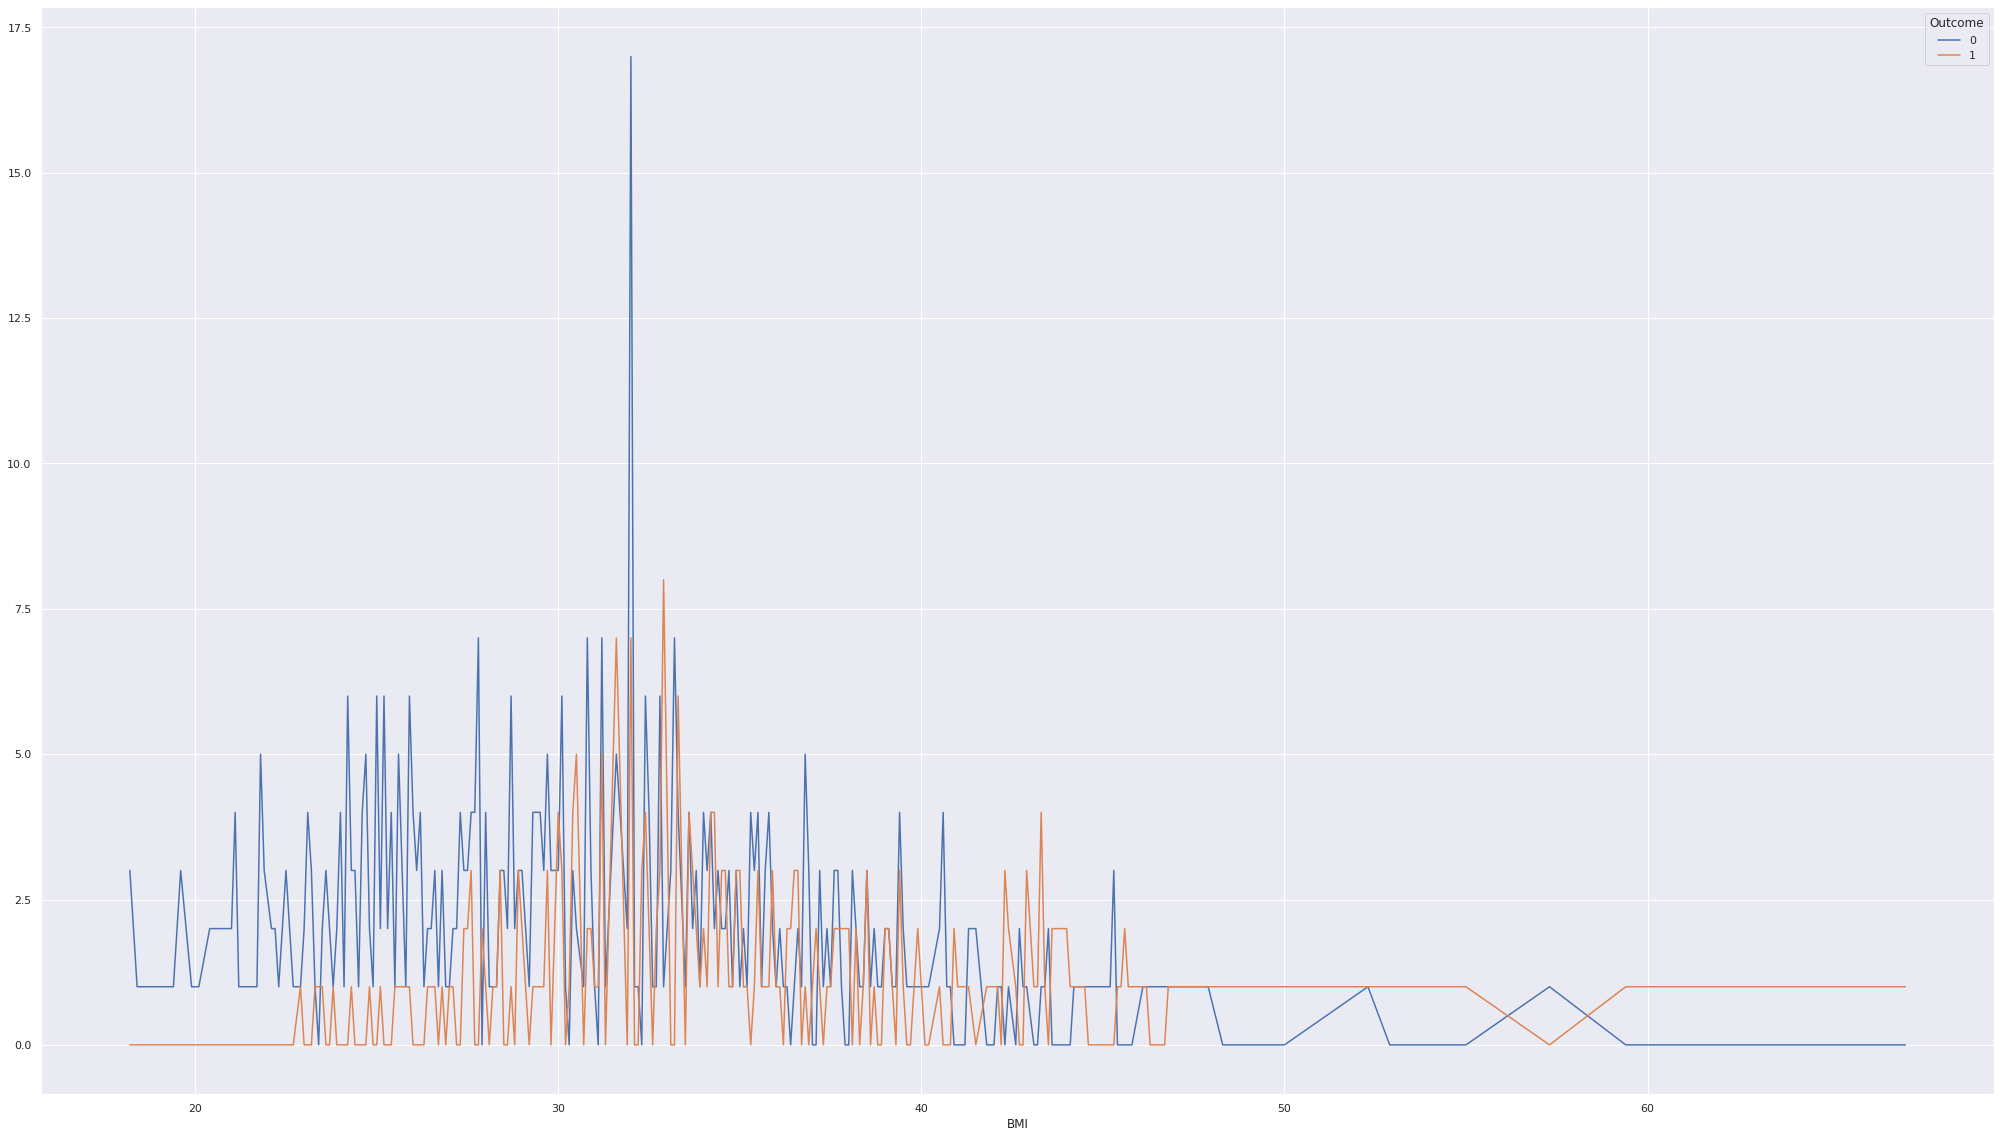

In [182]:
bct = pd.crosstab(my_question.BMI,my_question.Outcome)
scatterplot = bct.plot.line(rot=0, figsize= (35,20))

In [183]:
pd.crosstab(my_question.BMI,my_question.Outcome).describe()

Outcome,0,1
count,247.000000,247.000000
mean,2.024291,1.085020
std,1.886898,1.348312
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,1.000000
max,17.000000,8.000000


In [185]:
my_question.dtypes

BMI        float64
Insulin    float64
Glucose      int64
Outcome      int64
dtype: object

#LOGIT#
First on original data

In [186]:
y, X = dmatrices('Outcome ~ Pregnancies + BloodPressure + SkinThickness + Glucose + Insulin + BMI + DiabetesPedigreeFunction + Age', diab, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)


0.77734375

In [187]:
y.mean()

0.3489583333333333

Cleaned Data

In [188]:
y2, X2 = dmatrices('Outcome ~ Glucose + Insulin + BMI', my_question, return_type="dataframe")
y2 = np.ravel(y2)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X2, y2)

# check the accuracy on the training set
model.score(X2, y2)


0.7630208333333334

In [189]:
y2.mean()

0.3489583333333333

According to this logistical regression, my original data with no cleaning and nothing done to it, had an accuracy of 77%. But when cleaned the accuracy descresed to 76%. This shows that our model is not very accurate, it is an alright model, even our means are very small. 

As I mentioned after the Chi Squared Test, the features that I chose to focus on do not seem to affect the outcome as much which is proven by the low score. 

#Prediction#
Here I will create an array with predicted values based on some ranges.


In [190]:
real_outcome = my_question['Outcome']
pred_outcome = []

BMI = my_question['BMI'].to_numpy()
Glucose = my_question['Glucose'].to_numpy()
Insulin = my_question['Insulin'].to_numpy()

#Now we put stuff into the predicted outcome []
#all of these are for they have diabetes.
for x in Glucose:
    if x > 126.0 and BMI[x] >= 25.0 and Insulin[x] >= 150.0:
          pred_outcome.append(1)
    else:
          pred_outcome.append(0)

print(pred_outcome)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#Evaluation/Performance Metrics#

In [191]:
y_predict = pred_outcome
y_test = real_outcome

pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predict 0','Predict 1'],index= ['True 0','True 1'] )

,Predict 0,Predict 1
True 0,474,26
True 1,240,28


Evaluation:

According to this my true negative 474, true positive are 28, false negative 240 and false positive are 26.

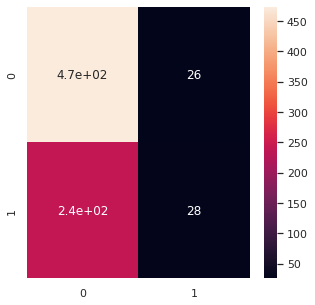

In [192]:
#heatmap with confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [193]:
# my code
conf_mat = confusion_matrix(y_test, y_predict)
tp = conf_mat[1][1]
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp, tn, fp, fn

(28, 474, 26, 240)

In [194]:
print(f'Accuracy: {(tp +tn)/(tp+fp+fn+tn)*100: .2f} %')
print(f'Recall: {(tp/(tp+fn))*100: .2f} %')
print(f'Precision: {(tp/(tp+fp))*100: .2f} %')
print(f'F1: {(2*((tp/(tp+fn))*(tp/(tp+fp)))/(((tp/(tp+fn)))+((tp/(tp+fp)))))*100: .2f} %')


Accuracy:  65.36 %
Recall:  10.45 %
Precision:  51.85 %
F1:  17.39 %


In [195]:
#got from udemy, for the inbuilt functions
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print(f'Accuracy: {accuracy* 100: .2f} %')
print(f'Recall: {recall* 100: .2f} %')
print(f'Precision: {precision * 100: .2f} %')
print(f'F1: {f1* 100: .2f} %')

Accuracy:  65.36 %
Recall:  10.45 %
Precision:  51.85 %
F1:  17.39 %


The results all match.

I will put my_question and the pred_outcome along with the actual_ outcome into one pd.


In [196]:
my_question

,BMI,Insulin,Glucose,Outcome
0,33.6,30.5,148,1
1,26.6,30.5,85,0
2,23.3,30.5,183,1
3,28.1,94.0,89,0
4,43.1,168.0,137,1
...,...,...,...,...
763,32.9,180.0,101,0
764,36.8,30.5,122,0
765,26.2,112.0,121,0
766,30.1,30.5,126,1


In [197]:
my_question1 = my_question
my_question1['Prediction'] = pred_outcome
my_question1 

,BMI,Insulin,Glucose,Outcome,Prediction
0,33.6,30.5,148,1,0
1,26.6,30.5,85,0,0
2,23.3,30.5,183,1,0
3,28.1,94.0,89,0,0
4,43.1,168.0,137,1,0
...,...,...,...,...,...
763,32.9,180.0,101,0,0
764,36.8,30.5,122,0,0
765,26.2,112.0,121,0,0
766,30.1,30.5,126,1,0


#SMOTE#
First we have to show that the data is imbalanced.

###Cleaned###
I first checked it with the cleaned data.

In [211]:
data_final = my_question1
X = data_final.loc[:, data_final.columns != 'Outcome']
y = data_final.loc[:, data_final.columns == 'Outcome']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  686
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


For some reason with the fixed new df my_questions1, the results are... weird. It seems that most of the data set has over sampled data?

In [209]:
data_final_vars= my_question1.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True]
[1 3 2 1]


In [210]:
X=X_train
y=y_train
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.654917
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.001  
Dependent Variable: Outcome          AIC:              711.3812
Date:               2022-06-25 03:03 BIC:              728.5252
No. Observations:   537              Log-Likelihood:   -351.69 
Df Model:           3                LL-Null:          -351.27 
Df Residuals:       533              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
BMI         -0.0519    0.0106  -4.8975  0.0000  -0.0727  -0.0312
Insulin      0.0006    0.0009   0.7217  0.4705  -0.0011   0.0023
Glucose      0.0101   

###Original###

So I decided I would check with the original df...turns out it has the same reults. I have no clue what to say. 

In [205]:
data_final = diab
X1 = data_final.loc[:, data_final.columns != 'Outcome']
y1 = data_final.loc[:, data_final.columns == 'Outcome']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)
columns = X1_train1.columns
os_data_X1,os_data_y1=os.fit_resample(X1_train1, y1_train1)
os_data_X1 = pd.DataFrame(data=os_data_X1,columns=columns )
os_data_y1= pd.DataFrame(data=os_data_y1,columns=['y1'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X1))
print("Number of no subscription in oversampled data",len(os_data_y1[os_data_y1['y1']==0]))
print("Number of subscription",len(os_data_y1[os_data_y1['y1']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y1[os_data_y1['y1']==0])/len(os_data_X1))
print("Proportion of subscription data in oversampled data is ",len(os_data_y1[os_data_y1['y1']==1])/len(os_data_X1))

length of oversampled data is  686
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [206]:
data_final_vars=diab.columns.values.tolist()
y1=['y1']
X1=[i for i in data_final_vars if i not in y1]
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X1_train1,y1_train1)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True  True False]
[1 1 3 4 5 1 1 2]


In [207]:
X1=X1_train1
y1=y1_train1
import statsmodels.api as sm
logit_model=sm.Logit(y1,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622858
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.048     
Dependent Variable:    Outcome            AIC:                684.9493  
Date:                  2022-06-25 03:03   BIC:                719.2373  
No. Observations:      537                Log-Likelihood:     -334.47   
Df Model:              7                  LL-Null:            -351.27   
Df Residuals:          529                LLR p-value:        2.0456e-05
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.0903   0.0329  2.7435 0

##LOGIT after SMOTE#

In [212]:
#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
clean_smote_model = LogisticRegression()
clean_smote_model = clean_smote_model.fit(X_train, y_train)

# check the accuracy on the training set
clean_smote_model.score(X_train, y_train)

0.7653631284916201

So...it increased...a bit. Even after SMOTE tried to fix the imbalanced data, it seems as if my data cleaning already did most of the job, because the score didn't change much. The data score actually went down a bit.



In [213]:
#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
org_smote_model = LogisticRegression()
org_smote_model = org_smote_model.fit(X1_train1, y1_train1)

# check the accuracy on the training set
org_smote_model.score(X1_train1, y1_train1)

0.7635009310986964

Same thing with the original data.

#ROC Curve#

Cleaned Data

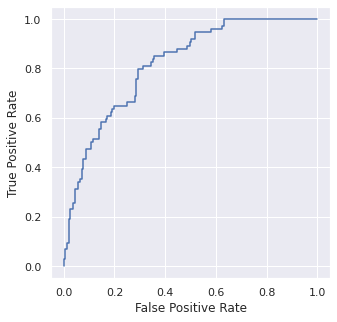

In [215]:
y_pred_proba = clean_smote_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#https://www.statology.org/plot-roc-curve-python/
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The closer to the top left the line is the better the model is at categorizing data. According to this most of the cruve does pull towards that was so that mean it does a pretty okay job at categorizing the data.

Original Data

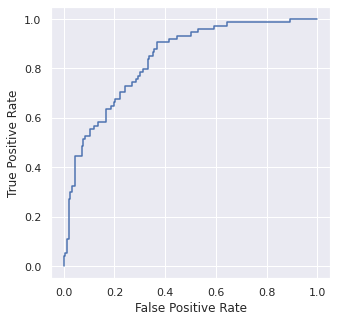

In [216]:
y1_pred1_proba = org_smote_model.predict_proba(X1_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test1,  y1_pred1_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

BUT it seems like the original data does a better job. 

#KNN vs Logistic Regresson#

LR: 0.757758 (0.050305)
KNN: 0.704306 (0.067142)


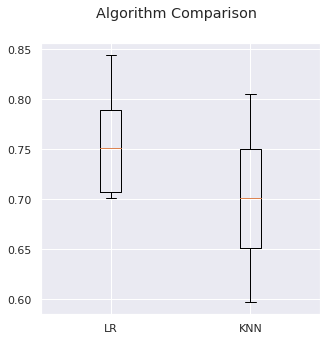

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
#I am pretty sure i'm missing something here that relates back to the data
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


This data here shows that Logistic Regression seems to be the better algorithm for this. 

#Conclusions#
Everything with everything that I tested, I can see that me cleaning the data, seperating it into a different data frame, and so on, doesn't really change the accuracy of the data set. For some reason its always in the 70's. Honestly I feel the data is a bit strange. The factors that I chose to test, when I researched online seemed to much bigger contributors to having diabetes than the ones that are shown to be contributing. 

<small> I am also quite lost on what I did towards the end of this. <small>
